# Math189 Homework4

### By Leah Seseri, Imangali Amangeldi

## Problem 1

In [4]:
install.packages("ISLR")

library(ISLR)
data("Auto")

mpg_median <- median(Auto$mpg)
mpg01 <- ifelse(Auto$mpg > mpg_median, 1, 0)
df <- data.frame(mpg01 = mpg01, Auto)
head(df)

Installing package into 'C:/Users/Admin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\Rtmpic947x\downloaded_packages


,mpg01,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,0,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,0,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,0,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,0,17,8,302,140,3449,10.5,70,1,ford torino
6,0,15,8,429,198,4341,10.0,70,1,ford galaxie 500


## Problem 2

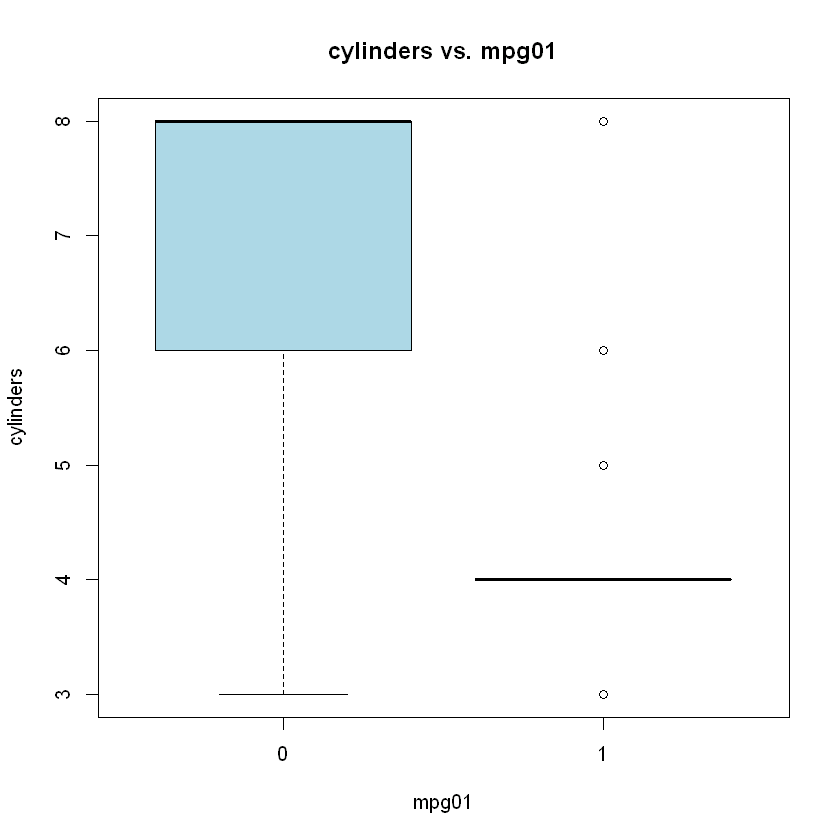

In [5]:
boxplot(cylinders ~ mpg01, data = df, main = "cylinders vs. mpg01", col = "lightblue")

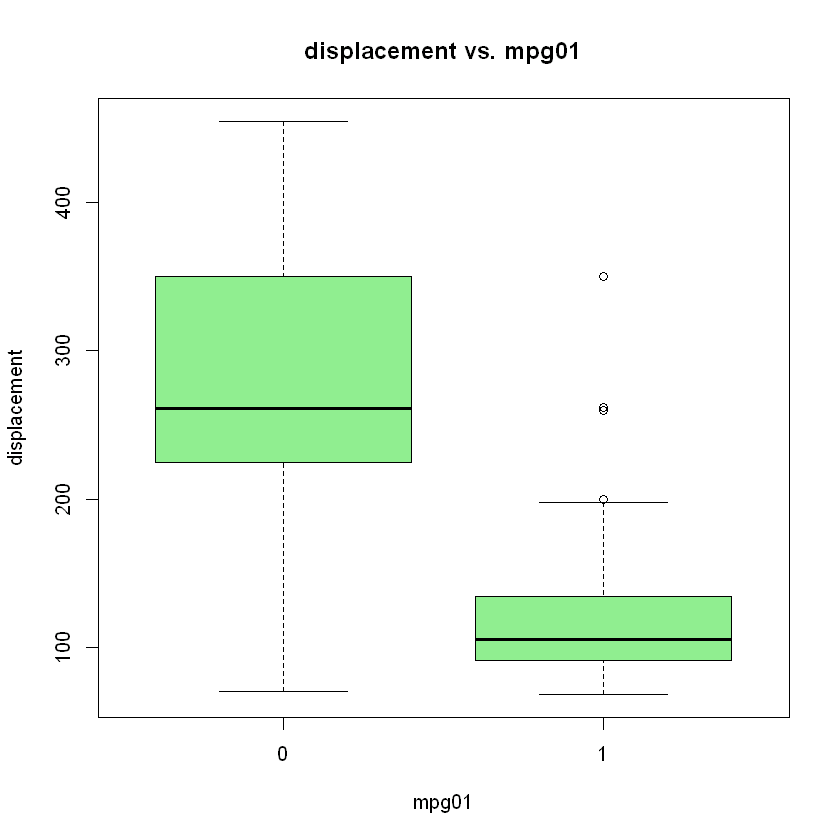

In [6]:
boxplot(displacement ~ mpg01, data = df, main = "displacement vs. mpg01", col = "lightgreen")

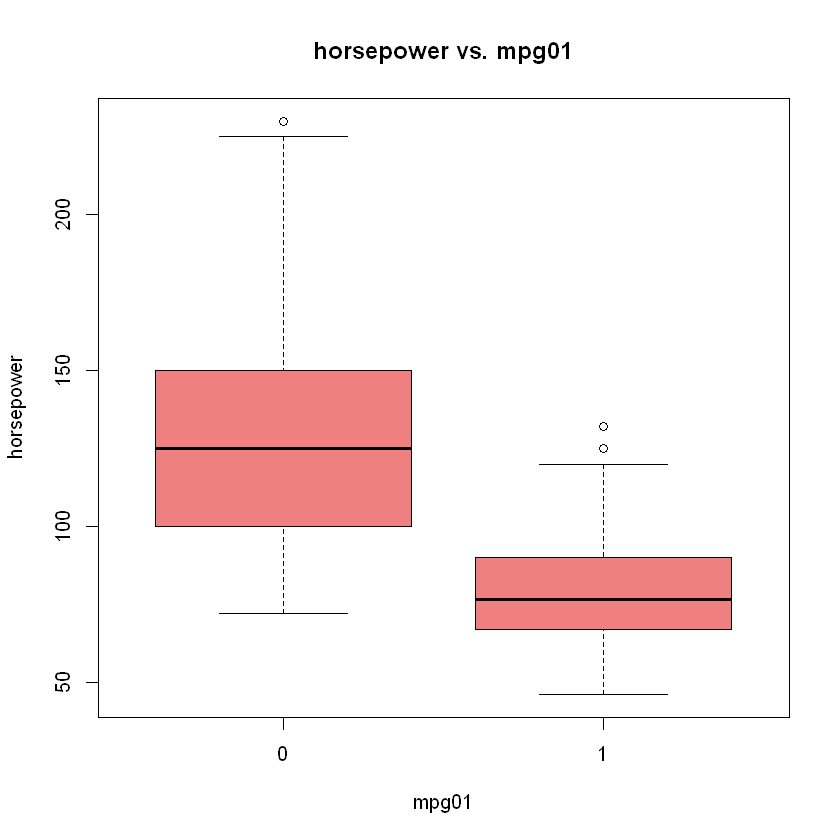

In [7]:
boxplot(horsepower ~ mpg01, data = df, main = "horsepower vs. mpg01", col = "lightcoral")


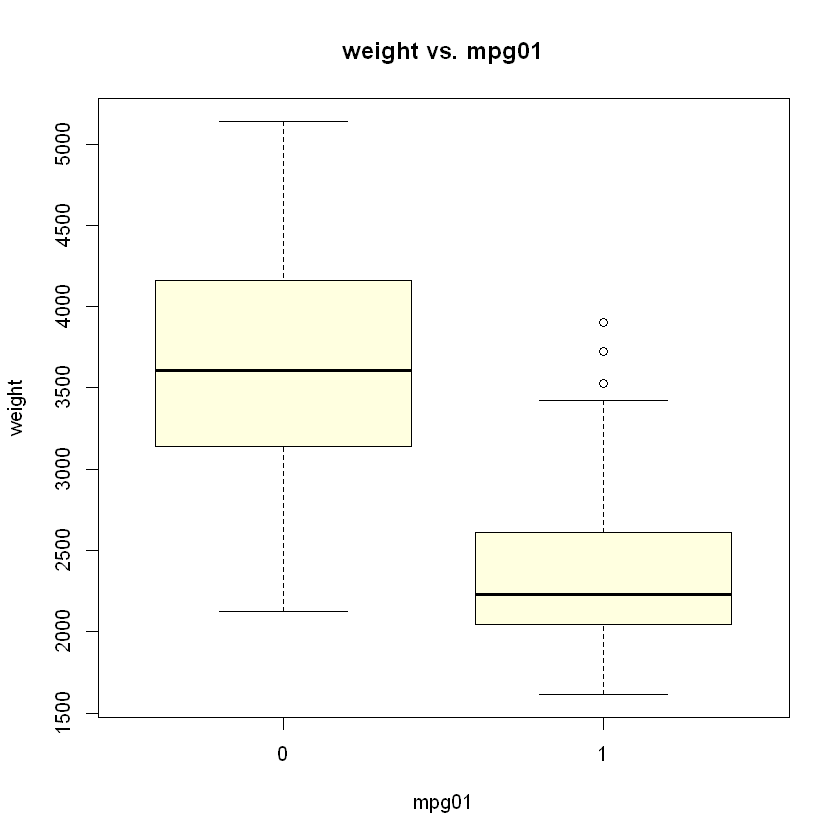

In [8]:
boxplot(weight ~ mpg01, data = df, main = "weight vs. mpg01", col = "lightyellow")

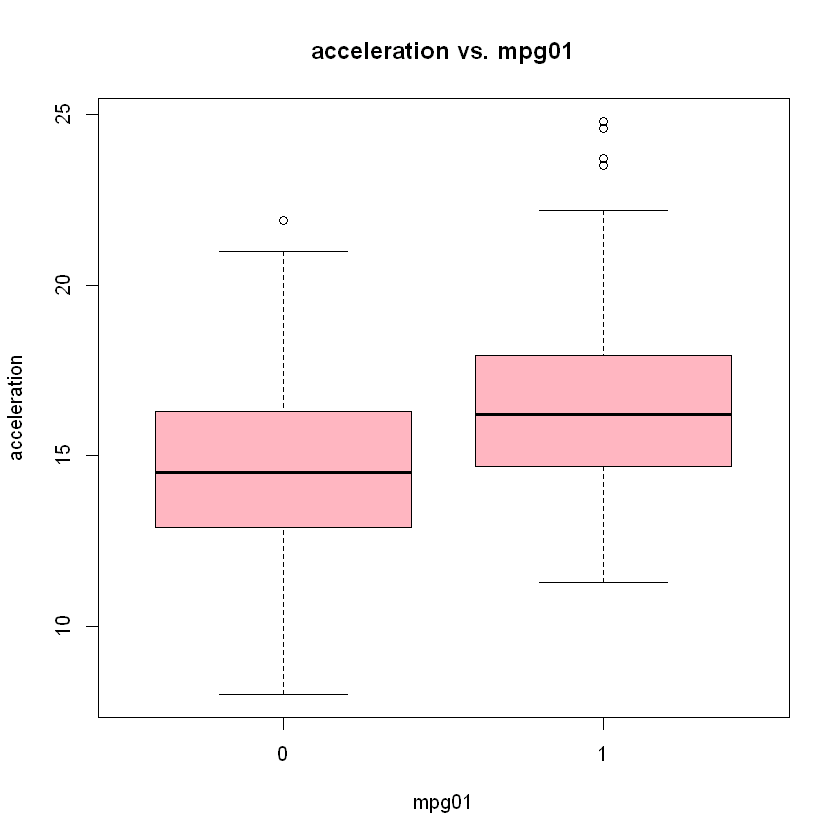

In [9]:
boxplot(acceleration ~ mpg01, data = df, main = "acceleration vs. mpg01", col = "lightpink")

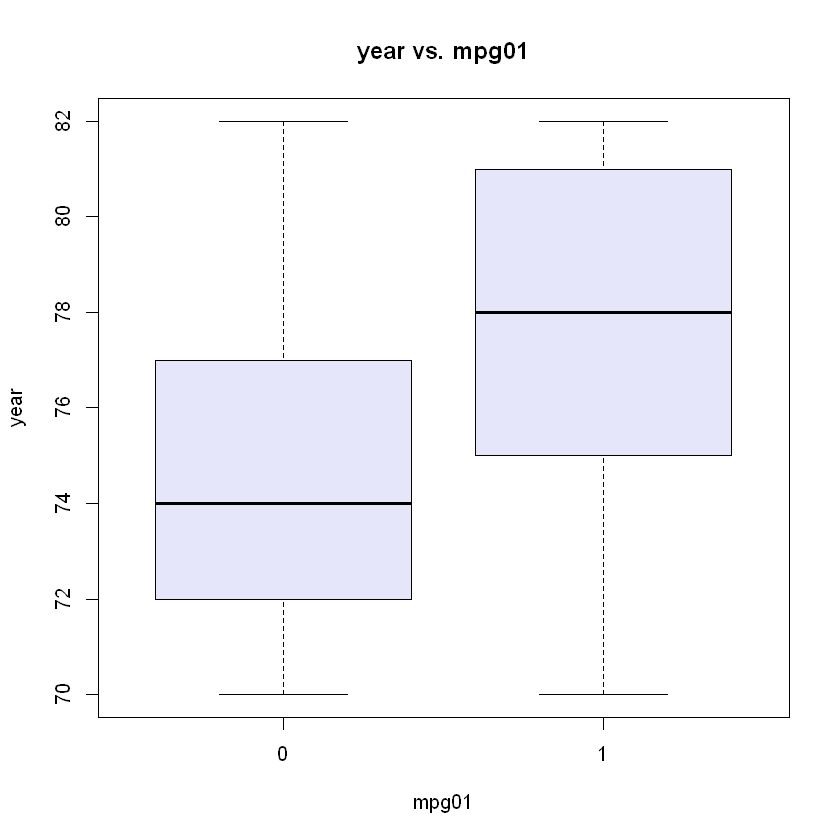

In [10]:
boxplot(year ~ mpg01, data = df, main = "year vs. mpg01", col = "lavender")

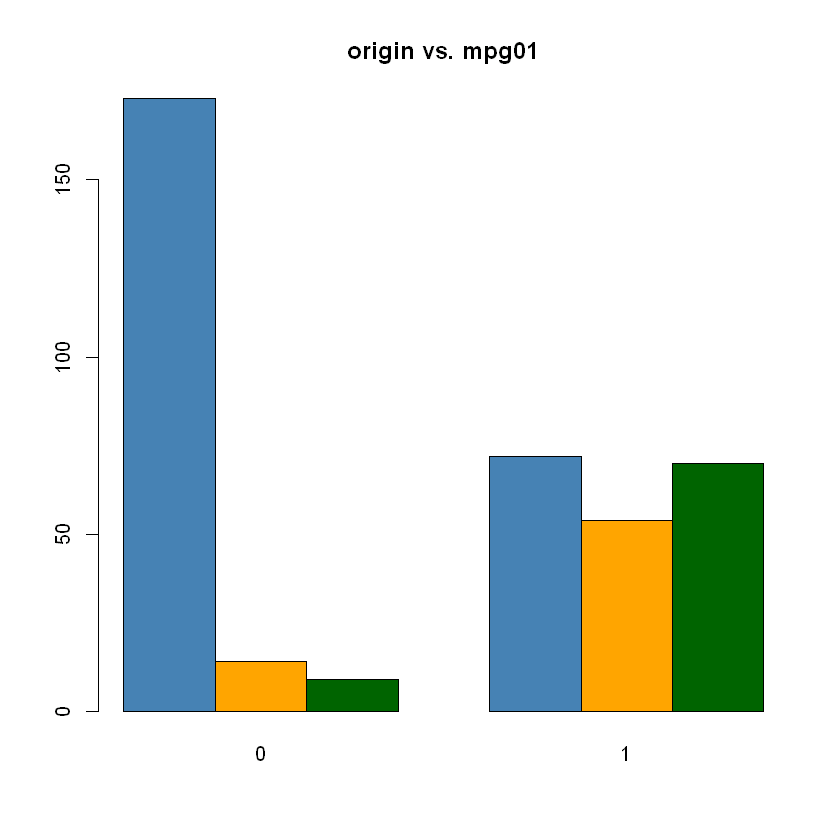

In [11]:
barplot(table(df$origin, df$mpg01),
        beside = TRUE, col = c("steelblue", "orange", "darkgreen"),
        main = "origin vs. mpg01")

Based on the boxplots I created to compare the different features with mpg01, the feature that seems to most likely be useful in predicting mpg01 is cylinders because there is a drastic difference between the cylinders for cars that have an mpg01 of 1 that is higher than the median compared to those with 0 and have a slower mpg. It appears that displacement, weight, and horsepower could also be useful in predicting mpg01 as it appears that cars that have a lower mpg tend to have higher displacement, weight, and horsepower than those with a higher mpg. Also, origin could have an impact on predicting mpg because based on the barplot, it seems that the some regions have more cars with lower mpg than other regions. Later testing confirmed that cylinders and displacement were strong predictors in both LDA and QDA. We also found that acceleration, while weak on its own, helped improve QDA when combined with other features. Adding more variables didn’t always help, especially in QDA, where it sometimes led to overfitting.

## Problem 3

In [12]:
set.seed(123)

# training set of size 300 so test set to size 92
train_indices <- sample(1:nrow(df), 300)

train <- df[train_indices, ]
test <- df[-train_indices, ]

## Problem 4

In [ ]:
# download the MASS package for LDA
install.packages("MASS")

# use the MASS package for LDA
library(MASS)

In [33]:
# Fit LDA model
lda_fit <- lda(mpg01 ~ cylinders + displacement, data = train)

# Predict on test data
lda_pred <- predict(lda_fit, newdata = test)
lda_class <- lda_pred$class

# compute test error rate
lda_test_error <- mean(lda_class != test$mpg01)
lda_test_error

[1] 0.1086957

## Problem 5

In [36]:
# Fit QDA model
qda_fit <- qda(mpg01 ~ displacement + weight + acceleration, data = train)

# Predict on test data
qda_pred <- predict(qda_fit, newdata = test)
qda_class <- qda_pred$class

# compute test error rate
qda_test_error <- mean(qda_class != test$mpg01)
qda_test_error

[1] 0.09782609